In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [76]:
#读取初始数据，并查看前五行
Firstdata = pd.read_csv("D:/mydata/itdata/data/static_institution.csv",encoding = "gbk")
Firstdata.head()

,Unnamed: 0,row_names,institution_id,default_num,fullname,country,province,city,address,office,...,outward,net_asset,guarantee_rate,revenue,guarantee_bond,level1_id,level2_id,rating_date,level_name,warning_state
0,1,1,10198491,0.0,深圳市龙岗区投资控股集团有限公司,中国,广东省,深圳市,"广东省深圳市龙岗区中心城清林西路22号投资大厦八楼,九楼","广东省深圳市龙岗区中心城清林西路22号投资大厦八楼,九楼",...,387400.0,7.519418e+09,51.5199,2.486538e+09,NaN,S,S90,2017-08-25,AA,关注
1,2,2,10198492,0.0,平安银行股份有限公司,中国,广东省,深圳市,广东省深圳市罗湖区深南东路5047号,广东省深圳市罗湖区深南东路5047号,...,NaN,NaN,NaN,NaN,NaN,J,J66,2017-07-25,AAA,中性
2,3,3,10198493,0.0,万科企业股份有限公司,中国,广东省,深圳市,广东省深圳市盐田区大梅沙环梅路33号万科中心,广东省深圳市盐田区大梅沙环梅路33号万科中心,...,165700.0,1.677253e+11,0.9879,2.404772e+11,NaN,K,K70,NaN,NaN,NaN
3,4,4,10198494,0.0,深圳市振业(集团)股份有限公司,中国,广东省,深圳市,广东省深圳市罗湖区宝安南路2014号振业大厦B座11-17层,广东省深圳市罗湖区宝安南路2014号振业大厦B座11-17层,...,171029.4,5.240483e+09,32.6362,3.358826e+09,NaN,K,K70,2017-05-17,AA,关注
4,5,5,10198495,0.0,中国宝安集团股份有限公司,中国,广东省,深圳市,广东省深圳市罗湖区笋岗东路1002号宝安广场A座28-29层,广东省深圳市罗湖区笋岗东路1002号宝安广场A座28-29层,...,0.0,1.009040e+10,0.0000,6.411749e+09,NaN,S,S90,2017-08-17,AA+,中性


0.0     910
1.0      32
2.0      12
3.0       2
4.0       1
5.0       2
7.0       1
9.0       2
10.0      1
Name: default_num, dtype: int64


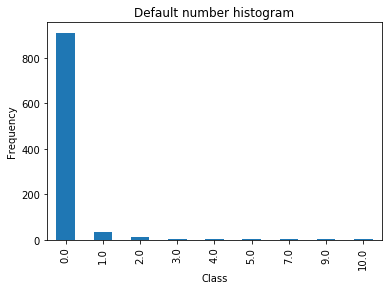

In [77]:
#观察样本分布情况
count_default_num = pd.value_counts(Firstdata['default_num'],sort = True).sort_index()
print (count_default_num)
count_default_num.plot(kind = 'bar')
plt.title("Default number histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.savefig("D:/mydata/itdata/image/Default_num.jpg")
plt.show()

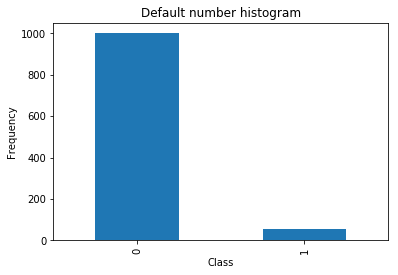

In [78]:
#数据的预处理,这里读取的文件都是经过处理的文件
initialdata = pd.read_csv("D:/mydata/itdata/traindata/static_institution_normal.csv",encoding = "gbk")
indic_value = pd.read_csv("D:/mydata/itdata/traindata/year_normal.csv",encoding = "gbk")
class1 = pd.read_csv("D:/mydata/itdata/traindata/class1.csv",encoding = "gbk")
class_four = pd.read_csv("D:/mydata/itdata/traindata/class_four.csv",encoding = "gbk")

initialdata = initialdata.sort_values(['institution_id'],ascending = True)
indic_value = indic_value.drop(['institution_id','Unnamed: 0'],axis =1)

initialdata = initialdata.drop(['institution_id'],axis =1)


result = pd.concat([initialdata,class1,class_four,indic_value],axis = 1)
result = result.drop(['Unnamed: 0','Unnamed: 0.1'],axis =1)
result.to_csv("D:/mydata/itdata/traindata/usedata.csv")

result.rename(columns=lambda x:x.replace('[','('), inplace=True)
result.rename(columns=lambda x:x.replace(']',')'), inplace=True)

count_default_num = pd.value_counts(result['label'],sort = True).sort_index()
count_default_num.plot(kind = 'bar')
plt.title("Default number histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [87]:
#将数据分为X和y
X = result.drop(['label'],axis =1)
Y = result.label

#模型调参
model = XGBClassifier(#learning_rate=0.1,
                     #n_estimators = 1000,
                     #max_depth = 4,
                     #min_child_weight =1,
                     #gamma = 0.1,
                     #subsample = 0.9,
                     #colsample_bytree = 0.7,
                     #objective = 'binary:logistic',
                     #scale_pos_weight=1,
                     #seed=27
                    )
colsample_bytree = [0.6,0.7,0.8,0.9]
param_grid = dict(colsample_bytree = colsample_bytree)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model,param_grid, scoring = "neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
#总结结果
print ("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means =grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print ("%f with: %r" % (mean, param))

Best: -0.043119 using {'colsample_bytree': 0.7}
-0.043645 with: {'colsample_bytree': 0.6}
-0.043119 with: {'colsample_bytree': 0.7}
-0.044167 with: {'colsample_bytree': 0.8}
-0.043339 with: {'colsample_bytree': 0.9}


In [88]:
seed = 7
test_size = 0.33
#将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =test_size, random_state=seed)
eval_set = [(X_test, y_test)]
#训练模型,并计算训练时间
start_time = time.time()
model = XGBClassifier(learning_rate=0.1,
                      max_depth=4,
                      min_child_weight =1,
                      gamma = 0.1,
                      subsample = 0.9,
                      colsample_bytree = 0.7,
                      objective = 'binary:logistic',
                      scale_pos_weight=1,
                      seed=27
                      )
model.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = "logloss",eval_set = eval_set,verbose = True)
print (time.time()-start_time)
#预测模型
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#计算精确度
accuracy = accuracy_score(y_test, predictions)
print ("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.605146
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.531499
[2]	validation_0-logloss:0.4706
[3]	validation_0-logloss:0.419601
[4]	validation_0-logloss:0.375345
[5]	validation_0-logloss:0.339015
[6]	validation_0-logloss:0.305977
[7]	validation_0-logloss:0.276861
[8]	validation_0-logloss:0.250976
[9]	validation_0-logloss:0.228883
[10]	validation_0-logloss:0.207765
[11]	validation_0-logloss:0.190294
[12]	validation_0-logloss:0.17501
[13]	validation_0-logloss:0.160006
[14]	validation_0-logloss:0.146993
[15]	validation_0-logloss:0.135097
[16]	validation_0-logloss:0.125823
[17]	validation_0-logloss:0.116559
[18]	validation_0-logloss:0.107959
[19]	validation_0-logloss:0.100568
[20]	validation_0-logloss:0.093826
[21]	validation_0-logloss:0.088584
[22]	validation_0-logloss:0.083414
[23]	validation_0-logloss:0.078487
[24]	validation_0-logloss:0.073476
[25]	validation_0-logloss:0.068911
[26]	validation_0-logloss:0.065554


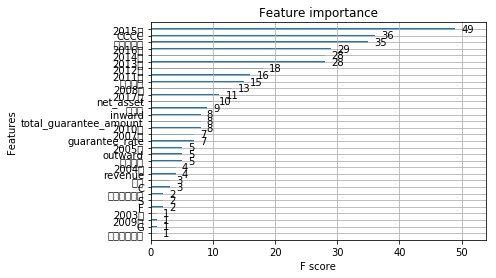

In [65]:
#打印特征分值
xgb.plot_importance(model)
plt.show()

In [66]:
#计算召回值
rf = pd.DataFrame(list(zip(predictions, y_test)),columns = ['predicted','actual'])
rf['correct']= rf.apply(lambda r:1 if r['predicted'] == r['actual'] and r['actual'] == 1 else 0, axis =1)
rf['count'] = rf.apply(lambda r:1 if r['actual'] == 1 else 0, axis = 1)
rf['wrong'] = rf.apply(lambda r:1 if r['predicted'] != r['actual'] and r['actual'] == 0 else 0, axis =1)
print (rf['correct'].sum()/rf['count'].sum())
print (rf['wrong'].sum()/(rf['count'].count()-rf['count'].sum()))
np.savetxt('D:/mydata/itdata/result/xgb_submission.csv',np.c_[range(1,len(y_test)+1),predictions,y_test],delimiter=',',header='ImageId,pred,real',comments='',fmt='%d')


0.8333333333333334
0.00297619047619
